# Week06: Visualization

Non-math visualization (Not required for midterm)
- Word cloud
- Geographic visualization (Geovisualization)

Math-related visualization
- Matplotlib, Seaborn
- Line Plots
- Scatter Plots
- Density and Contour Plots
- 3 – D plotting




We first instsall some necessary packages.

# Non-math visualization

In this lecture, we consider two approach to visualize data: Wordcloud and geographical visualization.

In [2]:
pip install requests beautifulsoup4 wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Base URLs

base_url_1 = "https://alumni.unc.edu/news-publications/all-news/"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Function to get news titles from a given URL
def get_titles_from_url(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        titles = []

        # Assuming news titles are within <a> tags with specific classes (adjust based on actual site structure)
        for tag in soup.select(".sidebar_link_list_label"):
            #print(tag)
            title = tag.get_text().strip()
            if title and len(title) > 4:  # Skip very short text
                titles.append(title)
        return titles
    else:
        return []

# Collecting titles from multiple pages
all_titles = []

# Scrape main page
all_titles.extend(get_titles_from_url(base_url_1))

# Scrape additional pages up to page 10

    
    
for i in range(2, 10):
    print('Web scrapping data from page ', i, '...')
    paginated_url = f"https://alumni.unc.edu/news-publications/all-news/page/{i}/"
    all_titles.extend(get_titles_from_url(paginated_url))


# Join all titles into one text block
text = ' '.join(all_titles)
text, len(text)

Web scrapping data from page  2 ...
Web scrapping data from page  3 ...
Web scrapping data from page  4 ...
Web scrapping data from page  5 ...
Web scrapping data from page  6 ...
Web scrapping data from page  7 ...
Web scrapping data from page  8 ...
Web scrapping data from page  9 ...


("A Powerful Dreamer You Really Shoulda Scene It Mama Dip’s Takes a Bow NIL Talk Now Chancellor, Roberts Discusses DEI, Politics, Vision Another Top-Five Ranking for UNC Basketball’s Blue-White Scrimmage Moved Off Campus Study Offers Dean Dome Options for Renovation, Replacement Mia Hamm 2025 Commencement Speaker As Mandated, DEI Jobs Eliminated, Reassigned Ice Hockey Club Begins Fundraising for New Arena Percentage of Black, Hispanic Students in First-Year Class Drops Carolina Alumni President Talks NIL With Bubba Cunningham Azaleas, Hollies Out. Indigo, Asters In. First-Week Stories — Now and Then Soccer, Rugby Tar Heels Earn Olympic Medals Women’s Soccer Coach Dorrance Retires Roberts Next UNC Chancellor Denied UNC Applications Can Be Redirected to Other State Schools Chancellor Search Enters Final Stages UNC Forms Initiative to Help Athletes Manage NIL Annual Research Funding Surpasses $1B — Again Students Work to Cool Campus Carolina’s Graduation Rate Highest Among UNC System Scho

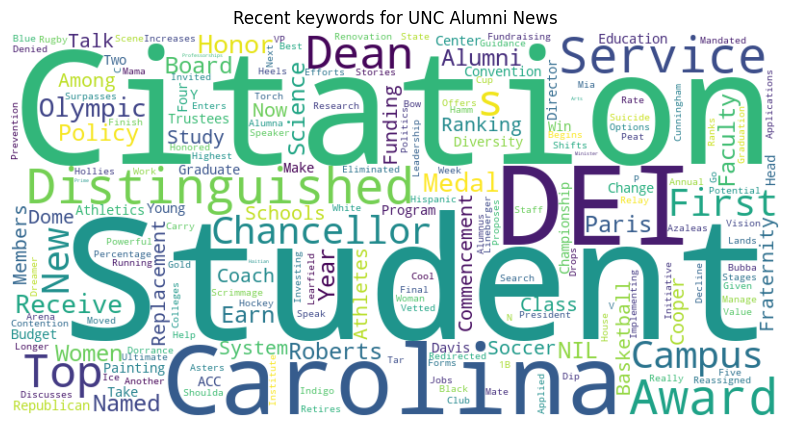

In [4]:
# Clean text and remove common sports-related words
excluded_words = {'unc', 'school','alumnus'}

words = text.split()

# Remove 'unc' and 'school' by filtering them out
filtered_words = [word for word in words if word.lower() not in excluded_words]

# Join the filtered words back into a string
text = ' '.join(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Recent keywords for UNC Alumni News")
plt.show()


In [5]:
all_titles = []


# change the scope of news to Dec 2020 and Jan 2021
    
    
for i in range(48, 52):
    print('Web scrapping data from page ', i, '...')
    paginated_url = f"https://alumni.unc.edu/news-publications/all-news/page/{i}/"
    all_titles.extend(get_titles_from_url(paginated_url))


# Join all titles into one text block
text = ' '.join(all_titles)
text, len(text)

Web scrapping data from page  48 ...
Web scrapping data from page  49 ...
Web scrapping data from page  50 ...
Web scrapping data from page  51 ...


('One Shot Might Do It for Those Who’ve Had COVID Depression, Anxiety Up Among College First-Years COVID-19 Researchers Fauci and Corbett to Address New Grads Chemical Soup to Ordered Biology: The Quest for How It Really Happened Visitors Center Launches “Sense of Place” Zoom Tour Dental School Studying Mouthwash Against COVID-19 $8 Million Gift Funds Public Discourse Speaker Series Tuition Rising for Nonresidents, Not for North Carolinians Applications Up Sharply for Class of 2025 Farewell to Rameses XXI UNC Researchers Find Oral Drug Promising at COVID Prevention, Treatment Franklin Postgame Rush Ignored COVID Rules — Twice Review, GAA Forums Win CASE Awards Nursing School’s Largest Gift to Fund Simulation Center, Scholarships DTH Reaches Settlement Over Silent Sam Negotiations UNC Helped Develop Promising COVID-19 Antibody Therapy Campus Y Vandalized With Racist, Anti-Semitic Language DTH, Duke’s Chronicle Launch Third Rivalry Challenge Budget Cutting Begins With 7.5 Percent in Oper

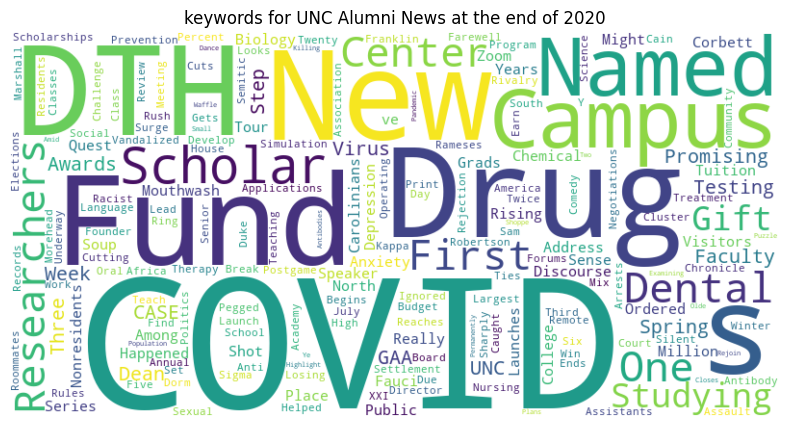

In [6]:
# Clean text and remove common sports-related words
excluded_words = {'unc', 'school','alumnus'}

words = text.split()

# Remove 'unc' and 'school' by filtering them out
filtered_words = [word for word in words if word.lower() not in excluded_words]

# Join the filtered words back into a string
text = ' '.join(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("keywords for UNC Alumni News at the end of 2020")
plt.show()


### Question: What do you observe from the difference between the above two plots?

The biggest diffrence I saw between the two plots was the second plot had a ton more to do with covid while the second plot did not have as much

## Analyze the birth place of NBA players 



In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
# List of U.S. state codes
state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
    'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Function to scrape NBA players' birth cities for a specific state
def scrape_state_birth_cities(state_code):
    url = f"https://www.basketball-reference.com/friv/birthplaces.fcgi?country=US&state={state_code}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(response.text)
    cities = []
    years = []
    points = []
    table1 = soup.select(".left+ .left")
    table2 = soup.select(".right:nth-child(5)")
    table3 = soup.select(".right:nth-child(21)")
    for i in range(len(table1)):
        city = table1[i].string
        if city == None:
            continue
            
        else:
            cities.append(city)
            year = table2[i].string
            years.append(int(year))
            point = table3[i].string
            points.append(point)

    return cities,years, points

# Initialize an empty DataFrame to store all data
list_city, list_year, list_points = [], [], []

# Iterate over all state codes and accumulate the data
for state_code in state_codes:
    print("Webscrapping the birthplace data for", state_code, "...")
    city, year, points = scrape_state_birth_cities(state_code)
    list_city, list_year, list_points = list_city + city, list_year + year, list_points + points

# Display the combined data
list_city, list_year, list_points
# Save the data to a CSV file for further use


Webscrapping the birthplace data for AL ...
Webscrapping the birthplace data for AK ...
Webscrapping the birthplace data for AZ ...
Webscrapping the birthplace data for AR ...
Webscrapping the birthplace data for CA ...
Webscrapping the birthplace data for CO ...
Webscrapping the birthplace data for CT ...
Webscrapping the birthplace data for DE ...
Webscrapping the birthplace data for FL ...
Webscrapping the birthplace data for GA ...
Webscrapping the birthplace data for HI ...
Webscrapping the birthplace data for ID ...
Webscrapping the birthplace data for IL ...
Webscrapping the birthplace data for IN ...
Webscrapping the birthplace data for IA ...
Webscrapping the birthplace data for KS ...
Webscrapping the birthplace data for KY ...
Webscrapping the birthplace data for LA ...
Webscrapping the birthplace data for ME ...
Webscrapping the birthplace data for MD ...
Webscrapping the birthplace data for MA ...
Webscrapping the birthplace data for MI ...
Webscrapping the birthplace data

(['Birmingham',
  'Athens',
  'Birmingham',
  'Leeds',
  'Birmingham',
  'Montgomery',
  'Huntsville',
  'Gadsden',
  'Birmingham',
  'Mobile',
  'Birmingham',
  'Huntsville',
  'Mobile',
  'Mobile',
  'Anniston',
  'Montgomery',
  'Mobile',
  'Town Creek',
  'Leighton',
  'Vredenburgh',
  'Birmingham',
  'Dothan',
  'Dothan',
  'Birmingham',
  'Birmingham',
  'Montgomery',
  'Clayton',
  'Hanceville',
  'Montgomery',
  'Birmingham',
  'Luverne',
  'Birmingham',
  'Covin',
  'Knoxville',
  'Birmingham',
  'Montgomery',
  'Andalusia',
  'Birmingham',
  'Tuskegee',
  'Centreville',
  'Birmingham',
  'Birmingham',
  'Tuskegee',
  'Birmingham',
  'Birmingham',
  'Fort Rucker',
  'Tuscaloosa',
  'Perry',
  'Birmingham',
  'Harpersville',
  'Tuscaloosa',
  'Birmingham',
  'Mobile',
  'Mobile',
  'Meridianville',
  'Birmingham',
  'Mobile',
  'Birmingham',
  'Mobile',
  'Harpersville',
  'Birmingham',
  'Phenix City',
  'Mobile',
  'Goodwater',
  'Goodwater',
  'Birmingham',
  'Mobile',
  'Mo

In [9]:
len(list_city), len(list_year)

(3383, 3383)

In [2]:
# load the webscrapping data
import pandas as pd
data = pd.read_csv('nba_players_birth_cities.csv')

# Extract the columns into lists
list_city = data['City'].tolist()
list_year = data['Year'].tolist()
list_points = data['Points'].tolist()

In [5]:
data.head(20)

,City,Year,Points
0,Birmingham,1992,1026
1,Athens,1999,1852
2,Birmingham,1982,2
3,Leeds,2000,23757
4,Birmingham,2022,10348
5,Montgomery,1984,2821
6,Huntsville,2024,89
7,Gadsden,1973,158
8,Birmingham,1965,2282
9,Mobile,2003,3368


In [11]:
unique_city = list(set(list_city))
len(unique_city)

814

In [24]:
import csv
input_file = 'city_coordinates.csv'

# Initialize empty dictionaries
city_long = {}
city_lati = {}

# Read the CSV file and populate the dictionaries
with open(input_file, mode='r') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        city = row['City']
        city_lati[city] = float(row['Latitude'])
        city_long[city] = float(row['Longitude'])

In [13]:
len(city_lati), len(unique_city)

(471, 814)

## Birthplace distribution of the NBA Players by year

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px


data = []

for city, city_year in zip(list_city, list_year):
    if city in city_lati and city in city_long:
        lat = city_lati[city]
        lon = city_long[city]
        if lat is not None and lon is not None:
            data.append({
                'city': city,
                'year': city_year,
                'lat': lat,
                'lon': lon
            })

df = pd.DataFrame(data)

# Ensure 'year' is of integer type
df['year'] = df['year'].astype(int)

# Sort the DataFrame by 'year' to ensure correct order
df = df.sort_values('year')

# Create an ordered categorical type for 'year'
df['year'] = pd.Categorical(df['year'], categories=sorted(df['year'].unique()), ordered=True)

# Calculate the center of the map
map_center = {
    'lat': df['lat'].mean(),
    'lon': df['lon'].mean()
}

# Create the density map using Plotly Express with specified category orders
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z=None,  # We're only interested in point density
    radius=25,  # Adjust radius as needed
    center=map_center,
    zoom=3,
    mapbox_style='open-street-map',
    animation_frame='year',
    title='NBA Player Birthplace Density Over Time',
    category_orders={'year': df['year'].cat.categories}  # Ensure years are in the correct order
)

# Display the figure
fig.show()

SyntaxError: invalid decimal literal (4093643833.py, line 48)

### Question: What do you observe from the above plot?

From this plot is is interseting to see that a lot of the basketball players where born on the east coast. Not nearly as many are from the midwest or the west coast.

In [27]:
coordinates = []
for city in list_city:
    if city in city_lati and city in city_long:
        lat = city_lati[city]
        lon = city_long[city]
        if lat is not None and lon is not None:
            coordinates.append({'city': city, 'lat': lat, 'lon': lon})

df = pd.DataFrame(coordinates)

# Calculate the map center
map_center = {
    'lat': df['lat'].mean(),
    'lon': df['lon'].mean()
}

# Create the density map using Plotly Express
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z=None,  # We're only interested in point density
    radius=15,  # Adjust radius as needed
    center=map_center,
    zoom=3,
    mapbox_style='open-street-map',
    title='Overall Birthplace Density Map',
    color_continuous_scale='Viridis'
)

# Display the figure
fig.show()


## Overall Birthplace distribution weighted by the points of each player

In [28]:
data = []
for city, city_year, weight in zip(list_city, list_year, list_points):
    if city in city_lati and city in city_long:
        lat = city_lati[city]
        lon = city_long[city]
        if lat is not None and lon is not None:
            data.append({
                'city': city,
                'year': city_year,
                'lat': lat,
                'lon': lon,
                'weight': int(weight)
            })

df = pd.DataFrame(data)


# Calculate the center of the map
map_center = {
    'lat': df['lat'].mean(),
    'lon': df['lon'].mean()
}


# Create the density map using Plotly Express
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z='weight',  # Use weights for the density
    radius=15,   # Adjust radius as needed
    center=map_center,
    zoom=3,
    mapbox_style='open-street-map',
    title="Birthplace Density Map Weighted by Players' Performance",
    color_continuous_scale='Viridis'
)

# Display the figure
fig.show()

### Question: What do you observe when the birthplaces are weighted by the performance of players? 

We see the birthplaces wirghted by plays as to tell not only where the most people come from but slaos where the best people come from. This gives a bias twoards the best players in the leauge while the less good ones onet have as much weight.

# In-Class activity: Change the weights to log-scale and update the plot

In [33]:
import math
data = []
for city, city_year, weight in zip(list_city, list_year, list_points):
    if city in city_lati and city in city_long:
        lat = city_lati[city]
        lon = city_long[city]
        if lat is not None and lon is not None:
            data.append({
                'city': city,
                'year': city_year,
                'lat': lat,
                'lon': lon,
                'weight': math.log(int(weight) +1)
            })

df = pd.DataFrame(data)


# Calculate the center of the map
map_center = {
    'lat': df['lat'].mean(),
    'lon': df['lon'].mean()
}


# Create the density map using Plotly Express
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z='weight',  # Use weights for the density
    radius=15,   # Adjust radius as needed
    center=map_center,
    zoom=3,
    mapbox_style='open-street-map',
    title="Birthplace Density Map Weighted by Players' Performance",
    color_continuous_scale='Viridis'
)

# Display the figure
fig.show()

#### Weighted birthplace distribution of the NBA Players by year

In [34]:
data = []
for city, city_year, weight in zip(list_city, list_year, list_points):
    if city in city_lati and city in city_long:
        lat = city_lati[city]
        lon = city_long[city]
        if lat is not None and lon is not None:
            data.append({
                'city': city,
                'year': city_year,
                'lat': lat,
                'lon': lon,
                'weight': int(weight)
            })

df = pd.DataFrame(data)

# Ensure 'year' is of integer type
df['year'] = df['year'].astype(int)

# Sort the DataFrame by 'year' to ensure correct order
df = df.sort_values('year')

# Create an ordered categorical type for 'year'
df['year'] = pd.Categorical(df['year'], categories=sorted(df['year'].unique()), ordered=True)

# Calculate the center of the map
map_center = {
    'lat': df['lat'].mean(),
    'lon': df['lon'].mean()
}

# Create the density map using Plotly Express with specified category orders
fig = px.density_mapbox(
    df,
    lat='lat',
    lon='lon',
    z='weight',  # We're only interested in point density
    radius=25,  # Adjust radius as needed
    center=map_center,
    zoom=3,
    mapbox_style='open-street-map',
    animation_frame='year',
    title="NBA Player Birthplace Density Over Time Weighted by Players' Performance",
    category_orders={'year': df['year'].cat.categories}  # Ensure years are in the correct order
)

# Display the figure
fig.show()